### Project to Predict Energy Output Based on Windspeed

1. Download the data
2. Run regression on it
3. "Train" the model
4. Give an analysis of the model's accuracy

***
First we read in the csv file wind.csv

In [89]:
# To read in the data from the file
import csv
# For numerical arrays
import numpy as np
# For plotting
import matplotlib.pyplot as plt
# For dataframes
import pandas as pd

In [90]:
# Read in the file to a db 
myFile = pd.read_csv('wind.csv', sep=',')

In [91]:
# Get array values from db
x = np.array(myFile.iloc[:,0])
y = np.array(myFile.iloc[:,1])

We plot the data points and use regression to find a line of best fit.

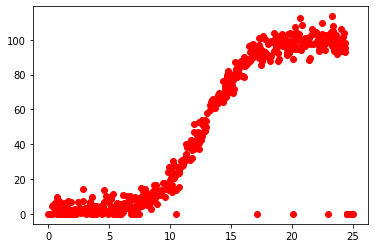

In [92]:
# Plot the points.
plt.plot(x, y, 'ro')
plt.show()

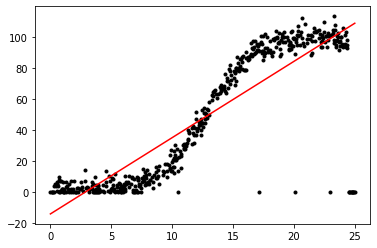

In [93]:
# Do regression on the x and y arrays using numpy.
m,c = np.polyfit(x, y, 1)
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')
plt.show()

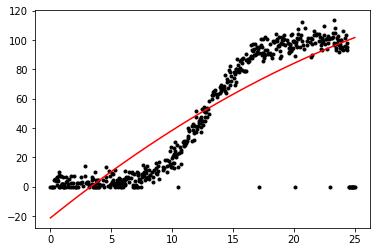

In [94]:
# Try a quadratic
a, b, c = np.polyfit(x, y, 2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x  + b * x + c, 'r-')
plt.show()

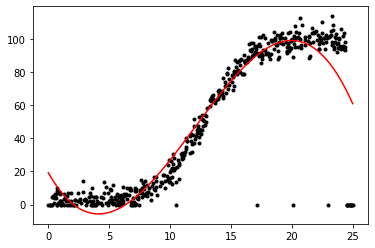

In [95]:
# Try a cubic, which is closer to what we would expect for the S shape
a, b, c, d = np.polyfit(x, y, 3)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x * x + c * x + d, 'r-')
plt.show()

There's obviously a limit here - the turbines turning off at 24.5 or whatever... how best to fit this? Let's try an extra dimension or two and see if that helps.

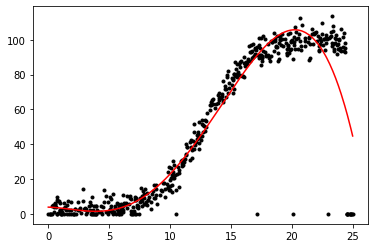

In [96]:
# Create variables with those values.
a, b, c, d, e = np.polyfit(x, y, 4)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x + b * x * x * x + c * x * x+ d * x + e, 'r-')
plt.show()

Closer...

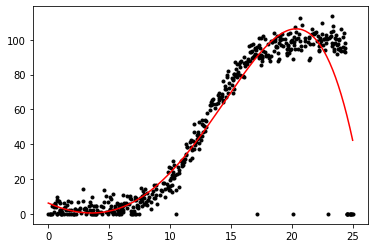

In [97]:
# Create variables with those values.
a, b, c, d, e, f = np.polyfit(x, y, 5)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x * x + b * x * x * x * x + c * x * x * x + d * x * x + e * x + f, 'r-')
plt.show()

Seems to be diminishing returns here. Surely it's possible to fit a model just within a range?

We will do some preprocessing of the data. It seems every value above a certain point is 0 - presumably the wind turbines turn off for fear of breaking. Let's find out what that value is.

***

Preprocessing:

In [98]:
[len(x),len(y)]

[500, 500]

In [99]:
for i in range(500):
    if y[i]==0:
        print(x[i])

0.0
0.125
0.15
0.225
0.275
0.726
0.7509999999999999
1.026
1.0759999999999998
1.301
1.5519999999999998
1.6769999999999998
1.827
2.0269999999999997
2.077
2.102
2.252
3.128
3.5039999999999996
3.5789999999999997
3.679
3.779
3.804
3.8789999999999996
4.428999999999999
4.88
5.556
5.781000000000001
5.806
5.931
6.782
6.857
6.957000000000001
7.107
7.432
10.511
17.167
20.095
22.998
24.499000000000002
24.525
24.575
24.65
24.75
24.775
24.85
24.875
24.95
25.0


Find the minimum and maximum nonzero values in the list...

In [100]:
min = 25
max = 0
for i in range(500):
    if x[i] < min and y[i]!=0:
        min = x[i]
    if max < x[i] and y[i]!=0:
        max = x[i]

print("Minimum nonzero x is ", min, " Maximum nonzero x is ", max)

Minimum nonzero x is  0.325  Maximum nonzero x is  24.399


In [101]:
min = 25
max = 0
for i in range(500):
    if y[i] == 0 and x[i] < min and y[i+1]!=0:
        min = x[i]
    if y[i] ==0 and max < x[i] and y[i-1]!=0:
        max = x[i]

print("Upper bound for lower zeros x is ", min, " Lower bound for upper zeros x is ", max)

Upper bound for lower zeros x is  0.275  Lower bound for upper zeros x is  24.499000000000002


So the threshold for lower zeros is between 0.275 and 0.325 and the threshold for upper zeros is between 24.399 and 24.499. Let's set our range as below 24.45.
We can leave the lower values in, as, if present, they will be near 0 anyway, whereas the values above 24.45 would definitely skew the curve.

***

Preprocessed dataframe:

In [102]:
# Preprocess and remove x's above 24.45.

# We'll create a new df 
preprocessed = []
for i in range(500):
    if x[i]<24.45:
        preprocessed.append([x[i],y[i]])

EditedData=np.array(preprocessed)
myEditedFile = pd.DataFrame({'X': EditedData[:, 0], 'Y': EditedData[:, 1]})
print(myEditedFile)

          X        Y
0     0.000    0.000
1     0.125    0.000
2     0.150    0.000
3     0.225    0.000
4     0.275    0.000
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[490 rows x 2 columns]


In [103]:
x = np.array(myEditedFile.iloc[:,0])
y = np.array(myEditedFile.iloc[:,1])

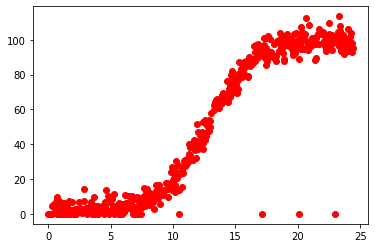

In [104]:
# Plot the points.
plt.plot(x, y, 'ro')
plt.show()

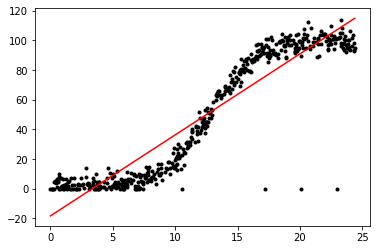

In [105]:
# Do regression on the x and y arrays using numpy.
m,c = np.polyfit(x, y, 1)
# Plot x and y and the regression line in red.
plt.plot(x, y, 'k.')
plt.plot(x, m * x + c, 'r-')
plt.show()

We experiment and check which line appears to be the best fit for 2<=n<=7

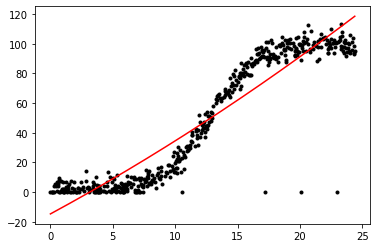

In [106]:
# Create variables with those values.
a, b, c = np.polyfit(x, y, 2)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x  + b * x + c, 'r-')
plt.show()

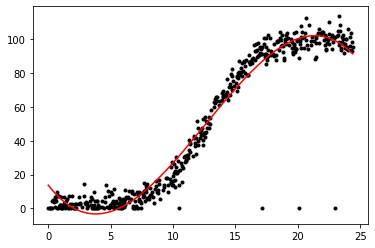

In [107]:
# Create variables with those values.
a, b, c, d = np.polyfit(x, y, 3)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x * x + c * x + d, 'r-')
plt.show()

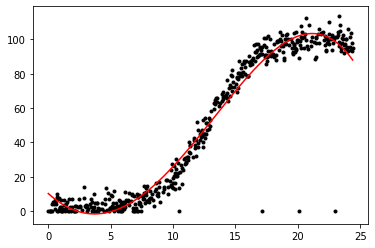

In [108]:
# Create variables with those values.
a, b, c, d, e = np.polyfit(x, y, 4)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x + b * x * x * x + c * x * x+ d * x + e, 'r-')
plt.show()

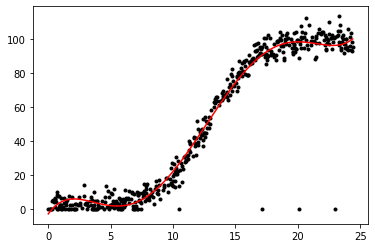

In [109]:
# Create variables with those values.
a, b, c, d, e, f = np.polyfit(x, y, 5)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x * x + b * x * x * x * x + c * x * x * x + d * x * x + e * x + f, 'r-')
plt.show()

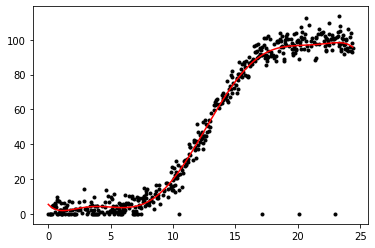

In [110]:
# Create variables with those values.
a, b, c, d, e, f, g, h = np.polyfit(x, y, 7)

# Plot the line and the points.
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x * x * x * x * x + b * x * x * x * x * x * x + c * x * x * x * x * x + d * x * x * x * x + e * x * x * x + f * x * x + g * x + h, 'r-')
plt.show()

Visually, it appears to be n=7, but solving a 7-dimensional equation is more difficult than solving a lower-dimensional one, so we won't use 7 dimensions for the version we put online, in case there is a load of traffic ;)

However, we will see which curve offers the closest approximation by excluding a sample from the dataframe and trying to predict their actual values.

***
#### Testing the models...

We hold back 20% of the data, train the model using the other 80%, and see how accurate it is.

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
train, test = train_test_split(myEditedFile, test_size=0.2, shuffle=False)

In [113]:
[len(train),len(test)]

[392, 98]

(These counts are fine - we took out 10 values where x > 24.45)

In [114]:
xT = np.array(train.iloc[:,0]) # We'll use capital T for train, small t for test
yT = np.array(train.iloc[:,1]) 

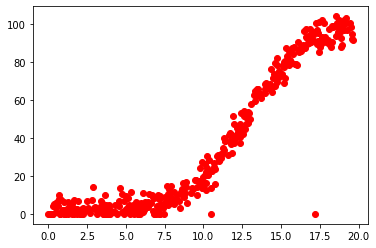

In [115]:
# Plot the points.
plt.plot(xT, yT, 'ro')
plt.show()

This is our training set. (I did not notice until later that the "random" sample was all the highest x values - will amend in a later cell.

In [116]:
xt = np.array(test.iloc[:,0])
yt = np.array(test.iloc[:,1])

Let's have a look at the test data.

errsum is 0.29534670245633393


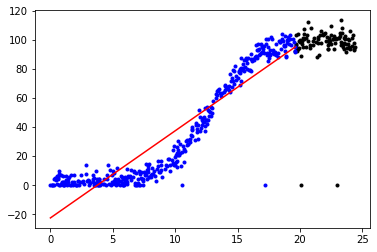

In [117]:
a1,b1 = np.polyfit(xT, yT, 1) # Here, a1 and b1 are the best-fit coefficients for a 1-dimensional polynomial 
errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a1*x_t+b1-y_t))/len(xt)
    # plt.plot(x_t,a1*x_t+b1,'g.') Obviously these are on the line of best fit.. No need to plot them
print("errsum is", errsum)

plt.plot(xt, yt, 'k.') # Well, there's a problem to start with - a non-random random selection

a1,b1 = np.polyfit(xT, yT, 1) # This gives the line of best fit according to our training set

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xT, a1 * xT + b1, 'r-') # This plots the line of best fit

plt.show()

The random sample is clearly not random. I guess this is due to the shuffle=False option. Will reconstruct Trial and test sets.

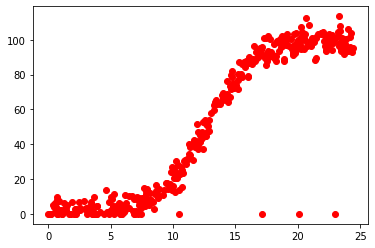

In [118]:
train, test = train_test_split(myEditedFile, test_size=0.2)
xT = np.array(train.iloc[:,0]) # We'll use capital T for train, small t for test
yT = np.array(train.iloc[:,1])
xt = np.array(test.iloc[:,0])
yt = np.array(test.iloc[:,1])
plt.plot(xT, yT, 'ro')
plt.show()

errsum is 0.0532151827009032


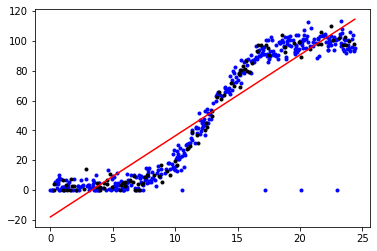

In [119]:
a1,b1 = np.polyfit(xT, yT, 1) # Gives straight line of best fit according to training set; a1 and b1 coefficients.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a1*x_t+b1-y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a1 * x + b1, 'r-') # This plots the line of best fit

plt.show()

This looks much more reasonable. Let us now try a quadratic and cubic and see if they fit better.

errsum is 0.03618843992444335


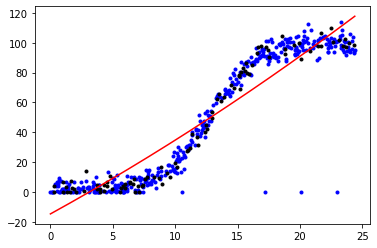

In [120]:
a2,b2,c2 = np.polyfit(xT, yT, 2) # Quadratic line of best fit according to training set; a2,b2,c2 coefficients.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a2 * x_t * x_t + b2 * x_t + c2 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a2 * x * x + b2 * x + c2, 'r-') # This plots the line of best fit

plt.show()

errsum is 0.001655236968972742


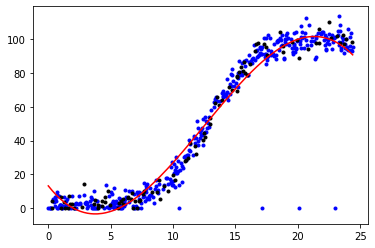

In [121]:
a3,b3,c3,d3 = np.polyfit(xT, yT, 3) # Cubic Line of best fit according to training set; a3,b3,c3,d3 coefficients.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a3 * x_t * x_t * x_t + b3 * x_t * x_t + c3 * x_t + d3 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a3 * x * x * x + b3 * x * x + c3 * x + d3, 'r-') # This plots the line of best fit

#for x in range(1,25):
#    plt.plot(x, a3 * x * x * x + b3 * x * x + c3 * x + d3,'r.')

plt.show()

The cubic seems more accurate than the quadratic (lower errsum), but higher degree polynomials appear more accurate again (see below examples) for some test sets. I will run over a number of random test selections and see which appears to have the lowest errsum the most often. 

errsum is 0.010414879180275114


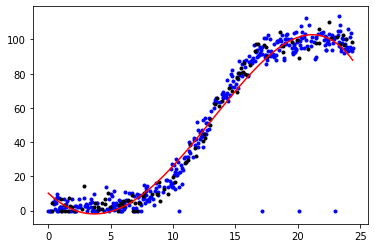

In [122]:
a4,b4,c4,d4,e4 = np.polyfit(xT, yT, 4) #Line of best fit according to training set, 4 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a4 * x_t * x_t * x_t * x_t + b4 * x_t * x_t * x_t + c4 * x_t * x_t + d4 * x_t + e4 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a4 * x * x * x * x + b4 * x * x * x + c4 * x * x + d4 * x + e4, 'r-') # This plots the line of best fit

plt.show()

errsum is 0.01222827607486642


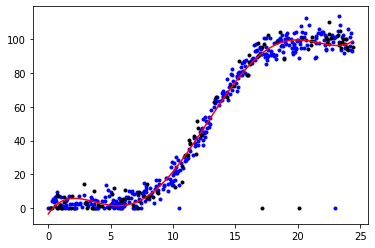

In [35]:
a5,b5,c5,d5,e5,f5 = np.polyfit(xT, yT, 5) #Line of best fit according to training set, 5 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a5 * x_t * x_t * x_t * x_t * x_t + b5 * x_t * x_t * x_t * x_t + c5 * x_t * x_t * x_t + d5 * x_t * x_t + e5 * x_t + f5 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a5 * x * x * x * x * x + b5 * x * x * x * x + c5 * x * x * x + d5 * x * x + e5 * x + f5, 'r-') # This plots the line of best fit

plt.show()

errsum is 0.017036263287843672


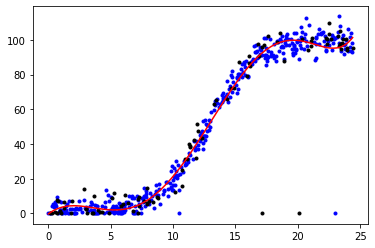

In [36]:
a6,b6,c6,d6,e6,f6,g6 = np.polyfit(xT, yT, 6) #Line of best fit according to training set, 6 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a6 * x_t * x_t * x_t * x_t * x_t * x_t + b6 * x_t * x_t * x_t * x_t * x_t + c6 * x_t * x_t * x_t * x_t + d6 * x_t * x_t * x_t + e6 * x_t * x_t + f6 * x_t + g6 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a6 *x*x*x*x*x*x + b6*x*x*x*x*x + c6 *x*x*x*x + d6 *x*x*x + e6*x*x + f6*x + g6, 'r-') # This plots the line of best fit

plt.show()

errsum is 0.000745656548876527


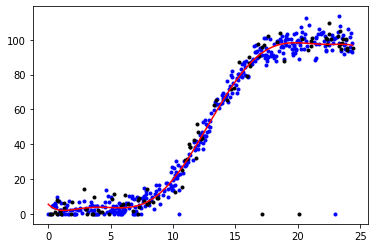

In [37]:
a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7) #Line of best fit according to training set, 7 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a7 * x_t * x_t * x_t * x_t * x_t * x_t * x_t + b7 * x_t * x_t * x_t * x_t * x_t * x_t + c7 * x_t * x_t * x_t * x_t * x_t + d7 * x_t * x_t * x_t * x_t + e7 * x_t * x_t * x_t + f7 * x_t * x_t + g7 * x_t + h7 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a7 *x*x*x*x*x*x*x + b7*x*x*x*x*x*x + c7*x*x*x*x*x + d7*x*x*x*x + e7*x*x*x + f7*x*x + g7*x + h7, 'r-') # This plots the line of best fit

plt.show()

In [38]:
count=[0,0,0,0,0,0,0]
for i in range(1000):
    all_errsums=[0,0,0,0,0,0,0]
    train, test = train_test_split(myEditedFile, test_size=0.2)
    xT = np.array(train.iloc[:,0])
    yT = np.array(train.iloc[:,1])
    xt = np.array(test.iloc[:,0])
    yt = np.array(test.iloc[:,1])
    
    a1,b1 = np.polyfit(xT, yT, 1)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a1*x_t+b1-y_t))/len(xt)
    all_errsums[0]=errsum
    #print(all_errsums)
    
    a2,b2,c2 = np.polyfit(xT, yT, 2)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a2 * x_t * x_t + b2 * x_t + c2 -y_t))/len(xt)
    all_errsums[1]=errsum
    #print(all_errsums)
    
    a3,b3,c3,d3 = np.polyfit(xT, yT, 3)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a3 * x_t * x_t * x_t + b3 * x_t * x_t + c3 * x_t + d3 -y_t))/len(xt)
    all_errsums[2]=errsum
    #print(all_errsums)

    a4,b4,c4,d4,e4 = np.polyfit(xT, yT, 4)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a4 * x_t * x_t * x_t * x_t + b4 * x_t * x_t * x_t + c4 * x_t * x_t + d4 * x_t + e4 -y_t))/len(xt)
    all_errsums[3]=errsum
    #print(all_errsums)
    
    a5,b5,c5,d5,e5,f5 = np.polyfit(xT, yT, 5)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a5 * x_t * x_t * x_t * x_t * x_t + b5 * x_t * x_t * x_t * x_t + c5 * x_t * x_t * x_t + d5 * x_t * x_t + e5 * x_t + f5 -y_t))/len(xt)
    all_errsums[4]=errsum
    #print(all_errsums)

    a6,b6,c6,d6,e6,f6,g6 = np.polyfit(xT, yT, 6)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a6 * x_t * x_t * x_t * x_t * x_t * x_t + b6 * x_t * x_t * x_t * x_t * x_t + c6 * x_t * x_t * x_t * x_t + d6 * x_t * x_t * x_t + e6 * x_t * x_t + f6 * x_t + g6 -y_t))/len(xt)
    all_errsums[5]=errsum
    #print(all_errsums)

    a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7)
    errsum = 0
    for i in range(len(xt)):
        x_t = test.iloc[i,0]
        y_t = test.iloc[i,1]
        errsum = abs(errsum + (a7 * x_t * x_t * x_t * x_t * x_t * x_t * x_t + b7 * x_t * x_t * x_t * x_t * x_t * x_t + c7 * x_t * x_t * x_t * x_t * x_t + d7 * x_t * x_t * x_t * x_t + e7 * x_t * x_t * x_t + f7 * x_t * x_t + g7 * x_t + h7 -y_t))/len(xt)
    all_errsums[6]=errsum
    #print(all_errsums)

    #print(np.min(all_errsums),all_errsums,"\n")
    min_pos = 0
    #print(all_errsums)
    for i in range(0,7):
        #print("all_errsums min_pos is", all_errsums[min_pos],all_errsums[i])
        if all_errsums[min_pos]>=all_errsums[i]:
            min_pos = i
    count[min_pos]=count[min_pos]+1
            #print(count)
print(count)
print(len(test))

[45, 50, 119, 154, 100, 120, 412]
98


So the polynomial in degee 7 is significantly more accurate than, say, the polynomial in degrees 3 or 4, but it may be more computationally costly. 

In [39]:
import time

tic=time.perf_counter()
for i in range(10000):
    a3,b3,c3,d3 = np.polyfit(xT, yT, 3)
toc=time.perf_counter()
print(toc-tic)

tic=time.perf_counter()
for i in range(10000):
    a4,b4,c4,d4,e4 = np.polyfit(xT, yT, 4)
toc=time.perf_counter()
print(toc-tic)

tic=time.perf_counter()
for i in range(10000):
    a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7)
toc=time.perf_counter()
print(toc-tic)

1.3636644410144072
1.6704091069987044
1.7810765769972932


It seems the 7-degree polynomial may be worth the extra computational cost. We will provide both options on the website, hopefully.



For the cubic, our coefficients are:

In [40]:
print(a3,b3,c3,d3)

-0.03861765590701252 1.4529925326864197 -9.282317227419556 13.33016302693798


For the 4-polynomial, our coefficients are:

In [41]:
print(a4,b4,c4,d4)

-0.0007270808849618952 -0.0030770452668278966 0.8972112683053779 -6.310658792941075


For the 7-degree polynomial, our coefficients are:

In [42]:
print(a7,b7,c7,d7,e7,f7,g7,h7)

-3.8952570448221906e-06 0.0003373218238151803 -0.01118775310327892 0.17523767069753995 -1.2978082114106477 4.35656528848124 -5.39690607107426 4.2725523236174405


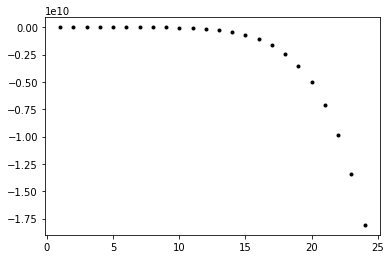

In [130]:
for x in range(1,25):
    plt.plot(x, -000003.941581283061136 * x * x * x * x * x * x * x + 0.0003440770101137519 * x * x * x * x * x * x -0.011534818188543508 * x * x * x * x * x + 0.1838315165430236 * x * x * x * x -1.4091946634530912 * x * x * x + 5.095745633022115 * x * x -7.582268967728165 * x 
 + 5.985976513515224,'k.')
 #   plt.plot(x, 0.5 * x * x,'k.')
plt.show()


In [62]:
print(a2,b2,c2)

0.02982393292911268 4.679796655895839 -14.715268608102122


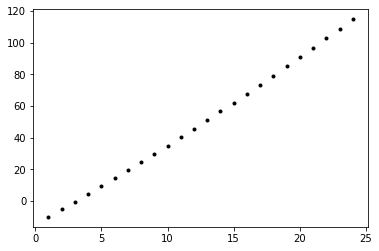

In [124]:
for x in range(1,25):
    plt.plot(x,0.02982393292911268 * x * x + 4.679796655895839 * x -14.715268608102122, 'k.')
plt.show()

In [65]:
print(a3,b3,c3,d3)

-0.03861765590701252 1.4529925326864197 -9.282317227419556 13.33016302693798


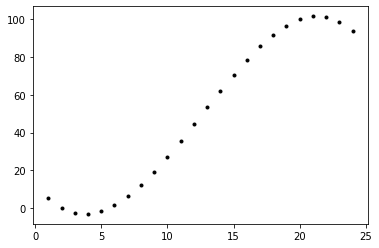

In [155]:
for x in range(1,25):
    plt.plot(x,-0.03861765590701252 * x * x * x + 1.4529925326864197 *x *x  -9.282317227419556 * x + 13.33016302693798, 'k.')
plt.show()

In [131]:
print(a4,b4,c4,d4,e4)

-0.0006237267568420695 -0.008182192589590107 0.9781387068282864 -6.748775974396727 10.18397809825498


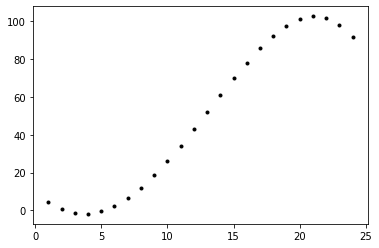

In [132]:
for x in range(1,25):
    plt.plot(x,-0.0006237267568420695 * x * x *x * x -0.008182192589590107 *x * x *x + 0.9781387068282864 * x * x -6.748775974396727 * x + 10.18397809825498, 'k.')
plt.show()

In [133]:
print(a5,b5,c5,d5,e5,f5)

0.0003867829461283353 -0.024349564130377376 0.5090768478214012 -3.7715268275024467 9.736758902777721 -2.443507948238237


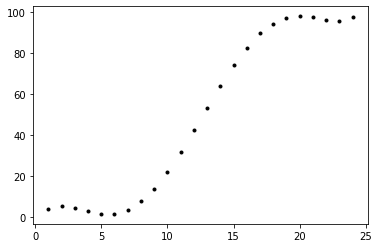

In [134]:
for x in range(1,25):
    plt.plot(x,0.0003867829461283353*x * x * x *x * x -0.024349564130377376*x *x * x *x + 0.5090768478214012*x * x * x -3.7715268275024467 *x * x + 9.736758902777721 *x -2.4435079482382, 'k.')
plt.show()

In [137]:
print(a6,b6,c6,d6,e6,f6,g6)

3.2615463441467485e-06 0.00014700385131038258 -0.017668550045920557 0.421654359161253 -3.235226029473795 8.424460231653068 -1.7069548950089406


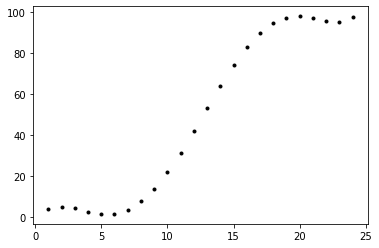

In [138]:
for x in range(1,25):
    plt.plot(x,3.2615463441467485e-06 * x * x * x *x *x *x + 0.00014700385131038258 * x * x * x * x * x -0.017668550045920557 * x * x * x * x + 0.421654359161253 * x * x * x -3.235226029473795 *x *x + 8.424460231653068 * x -1.7069548950089406
, 'k.')
plt.show()

In [139]:
print(a7,b7,c7,d7,e7,f7,g7,h7)

-3.8952570448221906e-06 0.0003373218238151803 -0.01118775310327892 0.17523767069753995 -1.2978082114106477 4.35656528848124 -5.39690607107426 4.2725523236174405


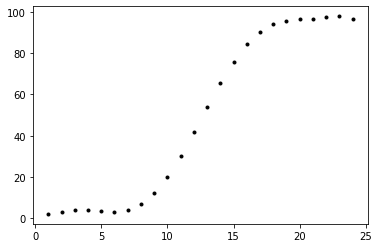

In [157]:
for x in range(1,25):
    plt.plot(x,-3.8952570448221906e-06 *x*x*x*x*x*x*x + 0.0003373218238151803*x*x*x*x*x*x -0.01118775310327892*x*x*x*x*x+ 0.17523767069753995*x*x*x*x -1.2978082114106477*x*x*x+ 4.35656528848124*x*x -5.39690607107426*x+ 4.2725523236174405
, 'k.')
plt.show()

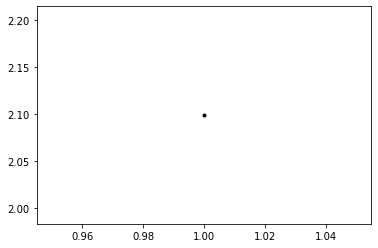

In [200]:
for x in [1]:
    plt.plot(x,-3.8952570448221906e-06 *x**7 + 0.0003373218238151803*x*x*x*x*x*x -0.01118775310327892*x*x*x*x*x+ 0.17523767069753995*x*x*x*x -1.2978082114106477*x*x*x+ 4.35656528848124*x*x -5.39690607107426*x+ 4.2725523236174405
, 'k.')
plt.show()

***

In [185]:
x = np.array(myFile.iloc[:,0])
y = np.array(myFile.iloc[:,1])
print(x[8])

0.501


In [186]:
preprocessed = []
for i in range(500):
    if (x[i]<24.45 and not y[i]==0):
        preprocessed.append([x[i],y[i]])

ExtraEditedData=np.array(preprocessed)
myExtraEditedFile = pd.DataFrame({'X': ExtraEditedData[:, 0], 'Y': ExtraEditedData[:, 1]})
print(myExtraEditedFile)

          X        Y
0     0.325    4.331
1     0.400    5.186
2     0.450    3.826
3     0.501    1.048
4     0.526    5.553
..      ...      ...
446  24.249  103.700
447  24.299   93.694
448  24.349   93.078
449  24.374   98.223
450  24.399   95.117

[451 rows x 2 columns]


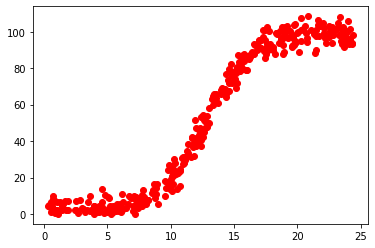

In [194]:
train, test = train_test_split(myExtraEditedFile, test_size=0.2)
xT = np.array(train.iloc[:,0]) # We'll use capital T for train, small t for test
yT = np.array(train.iloc[:,1])
xt = np.array(test.iloc[:,0])
yt = np.array(test.iloc[:,1])
plt.plot(xT, yT, 'ro')
plt.show()

errsum is 0.013444796168350573


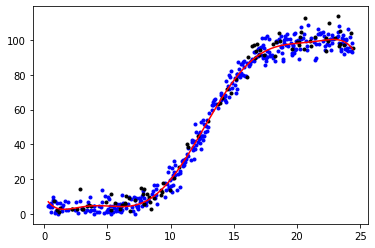

In [195]:
a7,b7,c7,d7,e7,f7,g7,h7 = np.polyfit(xT, yT, 7) #Line of best fit according to training set, 7 polynomial.

errsum = 0
for i in range(len(xt)):
    x_t = test.iloc[i,0]
    y_t = test.iloc[i,1]
    errsum = abs(errsum + (a7 * x_t * x_t * x_t * x_t * x_t * x_t * x_t + b7 * x_t * x_t * x_t * x_t * x_t * x_t + c7 * x_t * x_t * x_t * x_t * x_t + d7 * x_t * x_t * x_t * x_t + e7 * x_t * x_t * x_t + f7 * x_t * x_t + g7 * x_t + h7 -y_t))/len(xt)
print("errsum is", errsum)

plt.plot(xT, yT, 'b.') # This is the training set
plt.plot(xt, yt, 'k.') # This is the test set
plt.plot(x, a7 *x*x*x*x*x*x*x + b7*x*x*x*x*x*x + c7*x*x*x*x*x + d7*x*x*x*x + e7*x*x*x + f7*x*x + g7*x + h7, 'r-') # This plots the line of best fit

plt.show()

In [196]:
print(a7,b7,c7,d7,e7,f7,g7,h7)

-5.05950677021945e-06 0.0004416243856498899 -0.01493842256542704 0.2441013917668856 -1.9754696839749766 7.785955830566315 -13.21083965379266 10.549536751342602


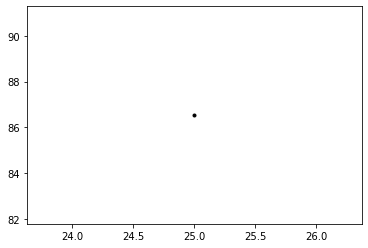

In [222]:
for x in [25]:
    plt.plot(x,-5.05950677021945e-06*x**7 +0.0004416243856498899*x**6 -0.01493842256542704*x**5 +0.2441013917668856*x**4 -1.9754696839749766*x**3 +7.785955830566315*x**2 -13.21083965379266*x +10.549536751342602
, 'k.')
plt.show()